In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Understanding and Exploration

In [2]:
#Reading the data
df = pd.read_csv("Dataset2.csv")

In [3]:
#Checking the first 5 rows
df.head()

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
0,1,<0,19,critical/other existing credit,business,640,<100,unemployed,1,male div/sep,...,22,stores,for free,110,unemp/unskilled non res,9,yes,no,3463,bad
1,2,<0,60,existing paid,business,903,<100,1<=X<4,2,male div/sep,...,25,bank,for free,400,unemp/unskilled non res,3,none,yes,1048,good
2,3,<0,72,critical/other existing credit,business,523,<100,1<=X<4,2,male div/sep,...,24,bank,for free,190,unemp/unskilled non res,13,none,no,357,bad
3,4,<0,55,existing paid,business,605,<100,4<=X<7,2,male div/sep,...,30,none,for free,320,skilled,1,none,yes,1296,bad
4,5,<0,67,delayed previously,business,709,<100,1<=X<4,2,male div/sep,...,30,stores,for free,170,unskilled resident,4,yes,no,1015,bad


In [4]:
#Checking the shape of the data
df.shape

(5050, 23)

In [5]:
#Checking the information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer_id             5050 non-null   int64 
 1   checking_status         5050 non-null   object
 2   duration                5050 non-null   int64 
 3   credit_history          5050 non-null   object
 4   purpose                 5050 non-null   object
 5   credit_amount           5050 non-null   int64 
 6   savings_status          5050 non-null   object
 7   employment              5050 non-null   object
 8   installment_commitment  5050 non-null   int64 
 9   personal_status         5050 non-null   object
 10  other_parties           5050 non-null   object
 11  residence_since         5050 non-null   int64 
 12  property_magnitude      5050 non-null   object
 13  age                     5050 non-null   int64 
 14  other_payment_plans     5050 non-null   object
 15  hous

* Installment_commitment varaible's datatype should be category.

# Data Cleaning and Analysis

In [6]:
#Checking the null values
df.isnull().sum()

Customer_id               0
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
bureau_score              0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
Spend_debit_card          0
class                     0
dtype: int64

There is no nul values in the dataset.

In [7]:
#Changing the data types
df['installment_commitment'] = df['installment_commitment'].astype('category')
df['residence_since'] = df['residence_since'].astype('category')
for col in df.columns:
    if df[col].dtype.name == 'object':
        df[col] = df[col].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Customer_id             5050 non-null   int64   
 1   checking_status         5050 non-null   category
 2   duration                5050 non-null   int64   
 3   credit_history          5050 non-null   category
 4   purpose                 5050 non-null   category
 5   credit_amount           5050 non-null   int64   
 6   savings_status          5050 non-null   category
 7   employment              5050 non-null   category
 8   installment_commitment  5050 non-null   category
 9   personal_status         5050 non-null   category
 10  other_parties           5050 non-null   category
 11  residence_since         5050 non-null   category
 12  property_magnitude      5050 non-null   category
 13  age                     5050 non-null   int64   
 14  other_payment_plans     

In [9]:
#Droppig customer id as it is not relevent for our analysis
df = df.drop('Customer_id',axis=1)

In [10]:
#Checking the summary of the contious variable
df.describe()

,duration,credit_amount,age,bureau_score,num_dependents,Spend_debit_card
count,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000
mean,34.799406,6245.153663,44.785545,200.471287,6.239208,2507.577624
std,19.852475,5651.082825,16.413567,155.330759,4.427874,1462.481192
min,4.000000,250.000000,19.000000,10.000000,1.000000,-50.000000
25%,18.000000,955.250000,30.000000,40.000000,2.000000,1225.000000
50%,33.000000,4277.500000,43.000000,190.000000,6.000000,2532.500000
75%,51.000000,10866.000000,59.000000,340.000000,10.000000,3762.750000
max,72.000000,18424.000000,75.000000,480.000000,14.000000,5000.000000


In [11]:
#Creating function to plot pie charts for categorical variable
def pie_charts(df_pie):
    category = []
    
    for col in df_pie.columns:
        if df_pie[col].dtype.name =='category':
            category.append(col)
    plt.figure(figsize=(20,30))
    ncols = 3
    nrows =(len(category)//ncols) +1
    
    for c, n in zip(category,np.arange(len(category))):
        ax = plt.subplot(nrows,ncols,n+1)
        df_pie[c].value_counts().plot(kind='pie',autopct='%.2f%%',ax=ax)
    plt.show()
                    

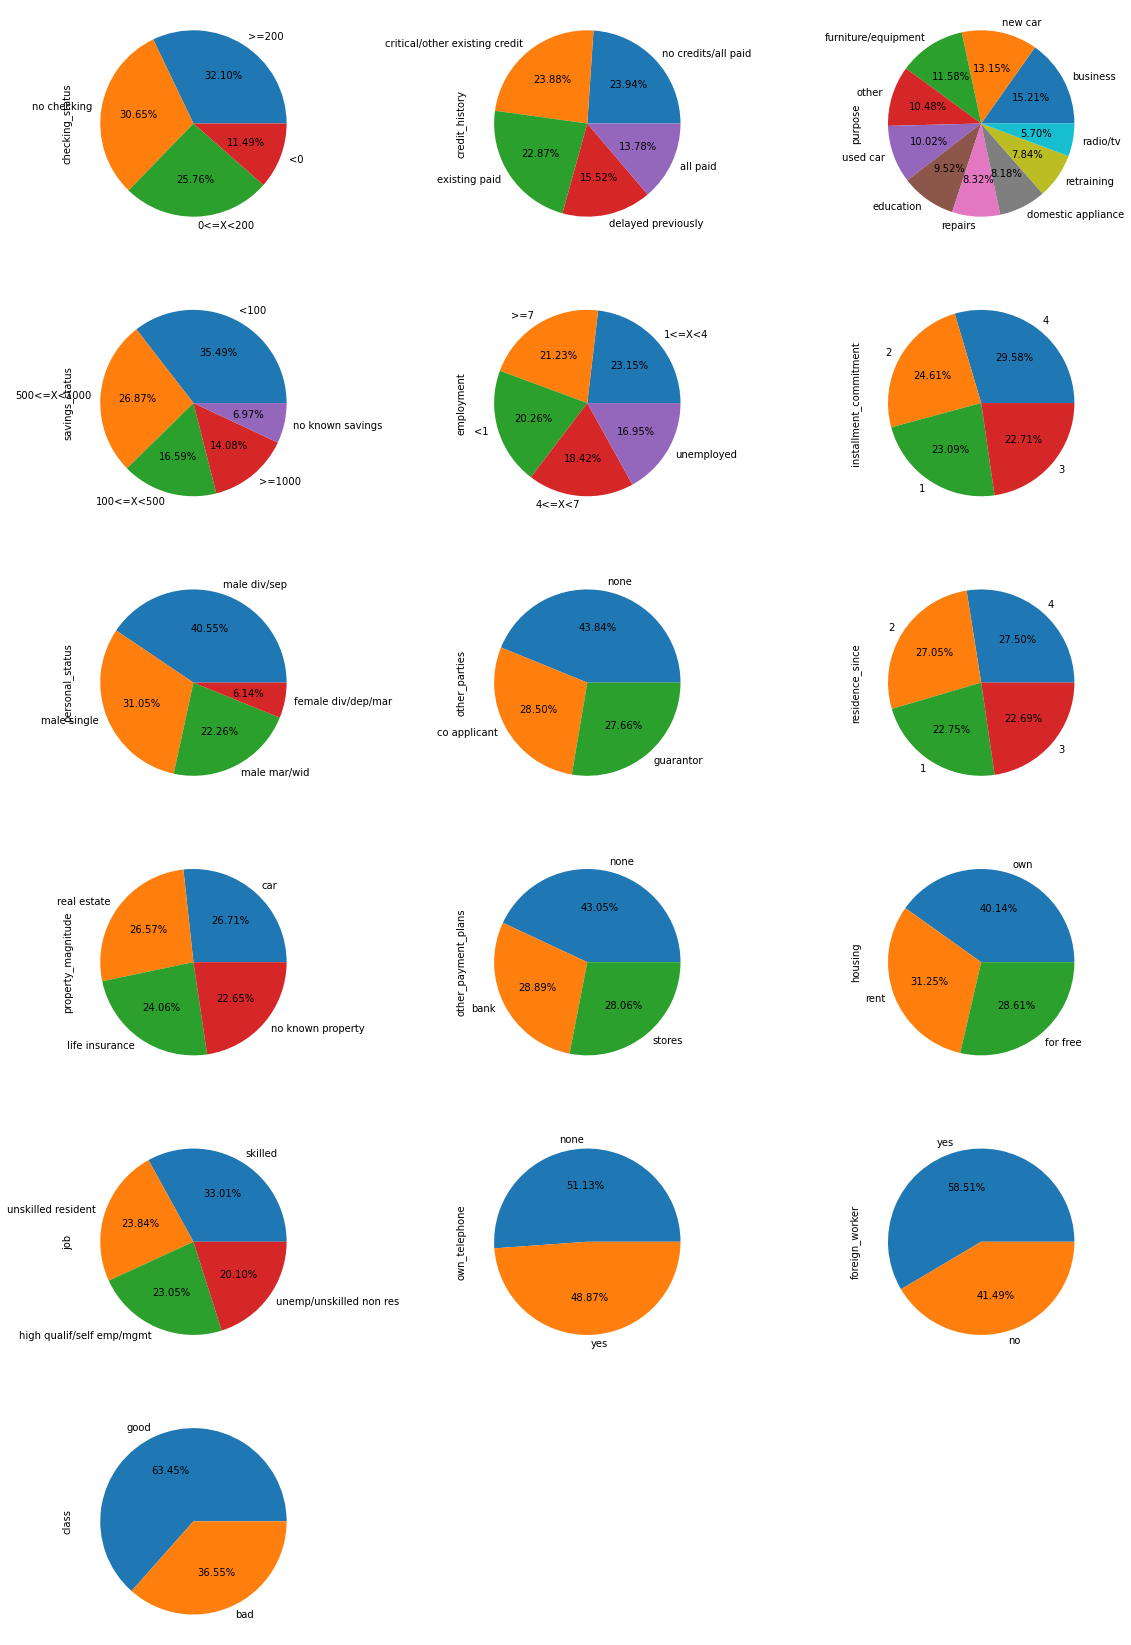

In [12]:
pie_charts(df)

From the plot, we can see that, dataset is balanced.

In [13]:
#Creating function to plot continuous variable
def dist_plot(df):
    continuous = []
    
    for col in df.columns:
        if df[col].dtype.name =='int64' or df[col].dtype.name =='float64':
            continuous.append(col)
    plt.figure(figsize=(20,15))
        
    ncol =3
    nrows = (len(continuous)/ncol) + 1
    
    for col, n in zip(continuous, np.arange(len(continuous))):
        ax = plt.subplot(nrows, ncol, n+1)
        sns.histplot(df[col],kde=True)
        #sns.distplot(df[col],ax=ax)
    plt.show()

<ipython-input-13-ed434c7d1dab>:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(nrows, ncol, n+1)
<ipython-input-13-ed434c7d1dab>:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(nrows, ncol, n+1)
<ipython-input-13-ed434c7d1dab>:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(nrows, ncol, n+1)
<ipython-input-13-ed434c7d1dab>:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(nrows, ncol, n+1)
<ipython-input-13-ed434c7d1dab>:14: MatplotlibDeprecationWarning

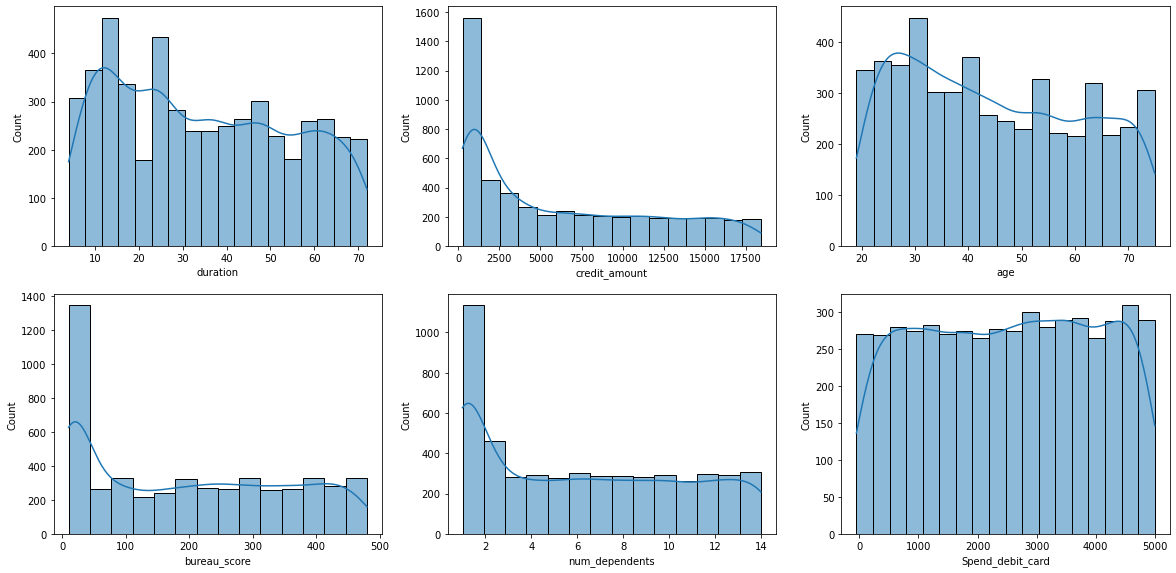

In [14]:
dist_plot(df)

There is no proper distribution of the continuous variable.

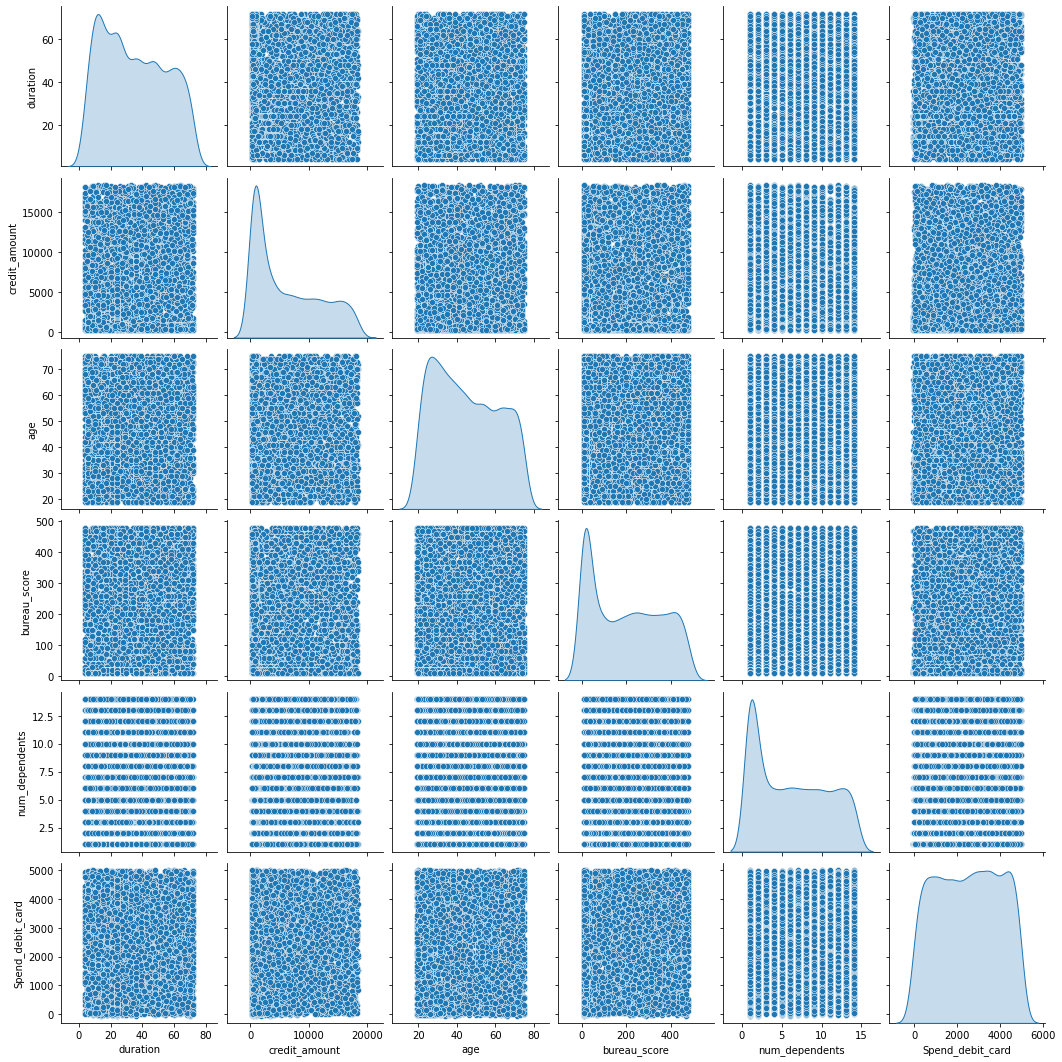

In [15]:
#Pairplot for the continuous variable
sns.pairplot(df,diag_kind='kde')

From the graph, we can observe that there is no relationsip between the variables.

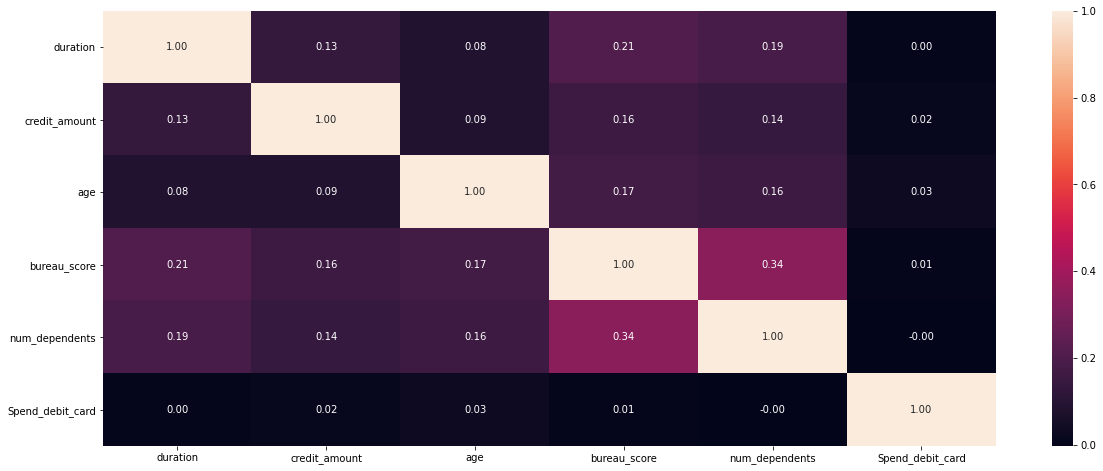

In [16]:
#Plotting the correlation matrix
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,fmt='0.2f')
plt.show()

There are very weak relationship between the variables.

<Figure size 1440x576 with 0 Axes>

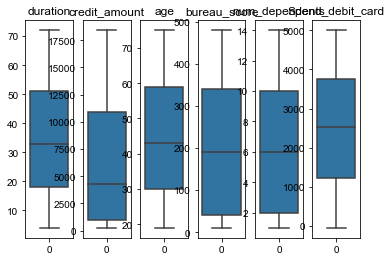

In [17]:
#Boxplot to detect outliers of continuous variable
columns_to_plot = ['duration','credit_amount' ,'age','bureau_score','num_dependents','Spend_debit_card']
plt.figure(figsize=(20,8))
fig, axes = plt.subplots(ncols=len(columns_to_plot))
for column, axis in zip(columns_to_plot, axes):
        sns.boxplot(data=df[column], ax=axis) 
        axis.set_title(column)
sns.set(rc={'figure.figsize':(23,8)})
plt.show()

There are no outliers in the dataset.

# Hypothesis Testing for continuous variable

Ho(Null Hypothesis):There is no significant difference in independent feature with different category of Target variable

H1(Alternate Hypothesis):There is significant difference in independent feature with different category of Target variable

Here we will use independent t test

In [18]:
#Defining the continuous columns
col = df.select_dtypes(['int64','float64']).columns

In [19]:
from scipy.stats import ttest_ind

In [20]:
#Independent t test
for c in col:
    x = np.array(df[c][df['class']=='bad'])
    y = np.array(df[c][df['class']=='good'])
    t, p_value = ttest_ind(x,y,axis=0)
    print('p_value:',p_value)
    if p_value < 0.05:          #assuming significant level at 0.05
        print('There is a significant difference in',c, 'feature with different category of Class.')
    else:
        print('There is no significant difference in',c, 'feature with different category of Class.')

p_value: 3.593709885893537e-08
There is a significant difference in duration feature with different category of Class.
p_value: 0.02819413318090771
There is a significant difference in credit_amount feature with different category of Class.
p_value: 0.004796376483007358
There is a significant difference in age feature with different category of Class.
p_value: 6.470740629838108e-13
There is a significant difference in bureau_score feature with different category of Class.
p_value: 9.553144524434114e-08
There is a significant difference in num_dependents feature with different category of Class.
p_value: 0.08981824104952904
There is no significant difference in Spend_debit_card feature with different category of Class.


In [21]:
#Dropping Spend_debit_card column
df = df.drop('Spend_debit_card',axis=1)

# Hypothesis Testing for Categorical Variable

Ho: There is no significant difference in independent feature for different category of target variable(Class)

H1: There is significant difference in independent feature for different category of target variable(Class)

Here we will use Chi Square test

In [22]:
from scipy.stats import chi2_contingency

In [23]:
#Defining the columns
col = df.select_dtypes('category').columns

In [24]:
#Chi Square Test
for c in col:
    crs_tab = pd.crosstab(df[c],df['class'])
    chi,p_value,dof,expected=chi2_contingency(crs_tab)
    print('P value:', p_value)
    if p_value < 0.05:
        print('There is a significant difference in',c, 'feature for different category of target variable(class).')
    else:
        print('There is no significant difference in',c, 'feature for different category of target variable(class).')

P value: 0.00025332730024232636
There is a significant difference in checking_status feature for different category of target variable(class).
P value: 0.023569315047435927
There is a significant difference in credit_history feature for different category of target variable(class).
P value: 4.4448310115842605e-12
There is a significant difference in purpose feature for different category of target variable(class).
P value: 1.0107298887280499e-05
There is a significant difference in savings_status feature for different category of target variable(class).
P value: 0.5541579034923946
There is no significant difference in employment feature for different category of target variable(class).
P value: 0.1497613350381756
There is no significant difference in installment_commitment feature for different category of target variable(class).
P value: 2.0750685304818207e-07
There is a significant difference in personal_status feature for different category of target variable(class).
P value: 9.6084

In [25]:
#Dropping employment, installment_commitment, residence_since and own_telephone variable
df = df.drop(['employment','installment_commitment','residence_since','own_telephone'],axis=1)

# Data Preparation and Modeling 

In [26]:
#Defining the columns for label and one hot encoding
label_encode = {'checking_status':{'no checking':0,'<0':1,'0<=X<200':2,'>=200':3},'savings_status':{'no known savings':0,
            '<100':1,'100<=X<500':2,'500<=X<1000':3,'>=1000':4},'foreign_worker':{'yes':1,'no':0},'class':{'bad':0,'good':1}}

one_hot_encode = ['credit_history','job','purpose','personal_status','other_parties','property_magnitude','other_payment_plans','housing']

In [27]:
#Encoding the variables
df =df.replace(label_encode)
df = pd.get_dummies(df,columns=one_hot_encode)

In [28]:
#Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
x = df.drop('class',axis=1)
y = df['class']
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.75,random_state=1)

In [29]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

# Logistic Regreassion

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
#Developing the model
log_model = LogisticRegression()

In [32]:
#Training the model
log_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [33]:
#Checking accuracy of the traing dataset
log_model.score(x_train_scaled,y_train)

0.6226564562978611

In [34]:
#prediction for testing data
log_model.predict(x_test_scaled)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [35]:
#Checking accuracy of the testing data
log_model.score(x_test_scaled,y_test)

0.6611243072050673

# SVM

In [36]:
from sklearn.svm import SVC

In [37]:
#Developing the model
svc_model = SVC()

In [38]:
#Training the model
svc_model.fit(x_train_scaled,y_train)

SVC()

In [39]:
#Checking accuracy of the traing dataset
svc_model.score(x_train_scaled,y_train)

0.6947451808819646

In [40]:
#prediction for testing data
svc_model.predict(x_test_scaled)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
#Checking accuracy of the testing data
log_model.score(x_test_scaled,y_test)

0.6611243072050673

# KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
#Developing the model
knn_model = KNeighborsClassifier()

In [44]:
#Training the model
knn_model.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [45]:
#Checking accuracy of the traing dataset
knn_model.score(x_train_scaled,y_train)

0.7111169791391603

In [46]:
#prediction for testing data
svc_model.predict(x_test_scaled)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [47]:
#Checking accuracy of the testing data
log_model.score(x_test_scaled,y_test)

0.6611243072050673

# Parameter tune for Logistic regression

In [49]:
from sklearn.model_selection import GridSearchCV
#Defining the parameter
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(log_model, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)

In [50]:
LR_search.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.377 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solve

[CV 4/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.617 total time=   0.0s
[CV 5/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.620 total time=   0.0s
[CV 1/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.616 total time=   0.0s
[CV 2/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.615 total time=   0.0s
[CV 3/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.620 total time=   0.0s
[CV 4/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.616 total time=   0.0s
[CV 5/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.622 total time=   0.0s
[CV 1/5] END C=0.1, penalt

[CV 5/5] END C=10, penalty=l1, solver=liblinear;, score=0.610 total time=   0.1s
[CV 1/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=10, penalty=l1, solver=saga;, score=0.619 total time=   0.3s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=10, penalty=l1, solver=saga;, score=0.606 total time=   0.3s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=10, penalty=l1, solver=saga;, score=0.608 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=10, penalty=l1, solver=saga;, score=0.618 total time=   0.4s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=10, penalty=l1, solver=saga;, score=0.610 total time=   0.3s
[CV 1/5] END C=10, penalty=l2, solver=newton-cg;, score=0.619 total time=   0.0s
[CV 2/5] END C=10, penalty=l2, solver=newton-cg;, score=0.606 total time=   0.0s
[CV 3/5] END C=10, penalty=l2, solver=newton-cg;, score=0.608 total time=   0.0s
[CV 4/5] END C=10, penalty=l2, solver=newton-cg;, score=0.618 total time=   0.0s
[CV 5/5] END C=10, penalty=l2, solver=newton-cg;, score=0.609 total time=   0.0s
[CV 1/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.619 total time=   0.0s
[CV 2/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.606 total time=   0.0s
[CV 3/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.608 total time=   0.0s
[CV 4/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.618 total time=   0.0s
[CV 5/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.609 total time=   0.0s
[CV 1/5] END C=10, penalty=l2, solver=liblinear;, score=0.619 total time=   0.0s
[CV 2/5] END C=10, penalty=l

C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=100, penalty=l1, solver=saga;, score=0.619 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=100, penalty=l1, solver=saga;, score=0.606 total time=   0.4s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=100, penalty=l1, solver=saga;, score=0.608 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=100, penalty=l1, solver=saga;, score=0.618 total time=   0.4s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=100, penalty=l1, solver=saga;, score=0.609 total time=   0.3s
[CV 1/5] END C=100, penalty=l2, solver=newton-cg;, score=0.619 total time=   0.2s
[CV 2/5] END C=100, penalty=l2, solver=newton-cg;, score=0.606 total time=   0.0s
[CV 3/5] END C=100, penalty=l2, solver=newton-cg;, score=0.608 total time=   0.0s
[CV 4/5] END C=100, penalty=l2, solver=newton-cg;, score=0.618 total time=   0.0s
[CV 5/5] END C=100, penalty=l2, solver=newton-cg;, score=0.609 total time=   0.0s
[CV 1/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.619 total time=   0.0s
[CV 2/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.606 total time=   0.0s
[CV 3/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.608 total time=   0.0s
[CV 4/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.618 total time=   0.0s
[CV 5/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.609 total time=   0.0s
[CV 1/5] END C=100, penalty=l2, solver=liblinear;, score=0.619 total time=   0.0s
[CV 2/5] END C=100, pe

C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=1000, penalty=l1, solver=saga;, score=0.619 total time=   0.3s
[CV 2/5] END ...C=1000, penalty=l1, solver=saga;, score=0.606 total time=   0.0s
[CV 3/5] END ...C=1000, penalty=l1, solver=saga;, score=0.608 total time=   0.0s
[CV 4/5] END ...C=1000, penalty=l1, solver=saga;, score=0.618 total time=   0.2s
[CV 5/5] END ...C=1000, penalty=l1, solver=saga;, score=0.609 total time=   0.3s
[CV 1/5] END C=1000, penalty=l2, solver=newton-cg;, score=0.619 total time=   0.0s
[CV 2/5] END C=1000, penalty=l2, solver=newton-cg;, score=0.606 total time=   0.0s
[CV 3/5] END C=1000, penalty=l2, solver=newton-cg;, score=0.608 total time=   0.0s
[CV 4/5] END C=1000, penalty=l2, solver=newton-cg;, score=0.618 total time=   0.0s
[CV 5/5] END C=1000, penalty=l2, solver=newton-cg;, score=0.609 total time=   0.0s
[CV 1/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.619 total time=   0.0s
[CV 2/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.606 total time=   0.0s
[CV 3/5] END ..C=1

C:\Users\dell1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
105 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Val

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [51]:
#Fing the accuracy score
LR_search.best_score_

0.622656437890158

In [52]:
#Finding the best parameter value
LR_search.best_params_

{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}

In [54]:
log_model_tuned =LogisticRegression(C=0.01,penalty='l1',solver='saga')

In [55]:
log_model_tuned.fit(x_train_scaled,y_train)

LogisticRegression(C=0.01, penalty='l1', solver='saga')

In [58]:
#Accuracy for training set
log_model_tuned.score(x_train_scaled,y_train)

0.6226564562978611

In [60]:
#Accuracy for testing set
log_model_tuned.score(x_test_scaled,y_test)

0.669833729216152

# Parameter tune for SVM

In [61]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [62]:
grid = GridSearchCV(svc_model, param_grid, refit = True, verbose = 3)

In [63]:
# fitting the model for grid search
grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time=   1.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time=   1.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.622 total time=   1.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.622 total time=   1.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.624 total time=   1.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.623 total time=   1.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.623 total time=   1.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.622 total time=   1.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.622 total time=   1.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.624 total time=   1.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.623 total time=   1.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.624 total time=   1.5s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.617 total time=   1.6s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.614 total time=   1.5s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.622 total time=   1.7s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.575 total time=   1.4s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.596 total time=   1.8s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.597 total time=   1.5s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.584 total time=   1.6s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.590 total time=   1.6s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.524 total time=   3.6s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.521 total time=   3.8s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.551 total time=   3.7s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [64]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [65]:
#Printing the best score
grid.best_score_

0.622656437890158

In [72]:
svm_model_tuned = SVC(C=0.1,gamma=1,kernel="rbf")

In [73]:
svm_model_tuned.fit(x_train_scaled,y_train)

SVC(C=0.1, gamma=1)

In [74]:
#Accuracy for training set
svm_model_tuned.score(x_train_scaled,y_train)

0.6226564562978611

In [75]:
#Accuracy for testing set
svm_model_tuned.score(x_test_scaled,y_test)

0.669833729216152

# Parameter tune for KNN

In [76]:
#Defing the range of parameter
leaf_size=list(range(1,100))
n_neighbors = list(range(1, 16, 2))
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan']

In [77]:
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric,leaf_size=leaf_size)
grid_search = GridSearchCV(estimator=knn_model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train_scaled,y_train)

In [78]:
grid_result.best_score_

0.5782929178707543

In [79]:
#Finding the best value for the parameter
grid_result.best_params_

{'leaf_size': 1,
 'metric': 'euclidean',
 'n_neighbors': 13,
 'weights': 'uniform'}

In [81]:
knn_tuned = KNeighborsClassifier(leaf_size=1,n_neighbors=13,metric='euclidean',weights="uniform")

In [82]:
knn_tuned.fit(x_train_scaled,y_train)

KNeighborsClassifier(leaf_size=1, metric='euclidean', n_neighbors=13)

In [83]:
#Accuracy for training set
knn_tuned.score(x_train_scaled,y_train)

0.6501188275679958

In [91]:
#Accuracy for testing set
knn_tuned.score(x_test_scaled,y_test)

0.6278701504354711

# Comparing all the models

In [97]:
def get_metrics_score(model):
    
    score_list = []
    
    pred_train = model.predict(x_train_scaled)
    pred_test = model.predict(x_test_scaled)
    
    train_acc = round(model.score(x_train_scaled,y_train)*100,2)
    test_acc = round(model.score(x_test_scaled,y_test)*100,2)
    
    train_recall = round(metrics.recall_score(y_train,pred_train)*100,2)
    test_recall = round(metrics.recall_score(y_test,pred_test)*100,2)
    
    train_precision = round(metrics.precision_score(y_train,pred_train)*100,2)
    test_precision = round(metrics.precision_score(y_test,pred_test)*100,2)
    
    train_f1 = round(metrics.f1_score(y_train,pred_train)*100,2)
    test_f1 = round(metrics.f1_score(y_test,pred_test)*100,2)
    
    score_list.append([train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1])
    
    return score_list

In [98]:
from sklearn import metrics
#Defining the odels
models = [log_model,log_model_tuned,svc_model,svm_model_tuned,knn_model,knn_tuned]
#Creating empty list to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
#looping through the models
for mod in models:
    j = get_metrics_score(mod)
    acc_train.append((j[0][0]))
    acc_test.append((j[0][1]))
    recall_train.append((j[0][2]))
    recall_test.append((j[0][3]))
    precision_train.append((j[0][4]))
    precision_test.append((j[0][5]))
    f1_train.append((j[0][6]))
    f1_test.append((j[0][7]))    

In [99]:
#Creating Dataframe
comparison_frame = pd.DataFrame({'Model':['log_model','log_model_tuned','svc_model','svm_model_tuned','knn_model','knn_tuned'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

#Sorting models in decreasing order of test accuracy
comparison_frame.sort_values(by='Test_Accuracy',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
1,log_model_tuned,62.27,66.98,100.00,100.00,62.27,66.98,76.75,80.23
3,svm_model_tuned,62.27,66.98,100.00,100.00,62.27,66.98,76.75,80.23
2,svc_model,69.47,66.43,99.53,97.40,67.21,67.21,80.24,79.54
0,log_model,62.27,66.11,97.16,97.40,62.72,66.99,76.23,79.38
5,knn_tuned,65.01,62.79,86.77,82.74,66.88,68.36,75.54,74.87
4,knn_model,71.11,58.67,84.31,71.99,73.30,68.12,78.42,70.00


* We can see that, none of the model is performed well. The models are underperformed as after the tuning also the accuracy pf the model is very low. So the models are underfitting.

Recommendations:

* Need to collect more sample to reduce underfitting.